In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import noise

In [2]:

def generate_random_candles(n=100):
    """
    Generate candlestick data with random price movements.
    """
    data = []
    price = 100
    for _ in range(n):
        open_price = price
        high_price = open_price + np.random.uniform(0, 5)
        low_price = open_price - np.random.uniform(0, 5)
        close_price = low_price + np.random.uniform(0, (high_price - low_price))
        price = close_price
        data.append([open_price, high_price, low_price, close_price])
    return pd.DataFrame(data, columns=['Open', 'High', 'Low', 'Close'])


In [3]:

def generate_brownian_motion_candles(n=100):
    """
    Generate candlestick data based on Brownian Motion.
    """
    data = []
    price = 100
    for _ in range(n):
        open_price = price
        change = np.random.normal(loc=0, scale=1)  # Normal distribution
        close_price = open_price + change
        high_price = max(open_price, close_price) + np.random.uniform(0, 2)
        low_price = min(open_price, close_price) - np.random.uniform(0, 2)
        price = close_price
        data.append([open_price, high_price, low_price, close_price])
    return pd.DataFrame(data, columns=['Open', 'High', 'Low', 'Close'])


In [4]:

def generate_perlin_noise_candles(n=100):
    """
    Generate candlestick data based on Perlin Noise.
    """
    data = []
    price = 100
    for i in range(n):
        open_price = price
        change = noise.pnoise1(i * 0.1) * 10  # Perlin noise
        close_price = open_price + change
        high_price = max(open_price, close_price) + np.random.uniform(0, 2)
        low_price = min(open_price, close_price) - np.random.uniform(0, 2)
        price = close_price
        data.append([open_price, high_price, low_price, close_price])
    return pd.DataFrame(data, columns=['Open', 'High', 'Low', 'Close'])


In [5]:

def generate_random_walk_candles(n=100):
    """
    Generate candlestick data based on a Random Walk.
    """
    data = []
    price = 100
    for _ in range(n):
        open_price = price
        change = np.random.choice([-1, 1]) * np.random.uniform(0, 5)
        close_price = open_price + change
        high_price = max(open_price, close_price)
        low_price = min(open_price, close_price)
        price = close_price
        data.append([open_price, high_price, low_price, close_price])
    return pd.DataFrame(data, columns=['Open', 'High', 'Low', 'Close'])


In [6]:

def generate_fbm_candles(n=100):
    data = []
    price = 100
    def fbm(x, octaves=6, lacunarity=2.0, gain=0.5):
        value = 0.0
        amplitude = 0.5
        frequency = 1.0
        for _ in range(octaves):
            value += amplitude * noise.pnoise1(x * frequency)
            frequency *= lacunarity
            amplitude *= gain
        return value

    for i in range(n):
        open_price = price
        change = fbm(i * 0.1) * 10  # fBm noise
        close_price = open_price + change
        high_price = max(open_price, close_price) + np.random.uniform(0, 2)
        low_price = min(open_price, close_price) - np.random.uniform(0, 2)
        price = close_price
        data.append([open_price, high_price, low_price, close_price])
    return pd.DataFrame(data, columns=['Open', 'High', 'Low', 'Close'])


In [7]:

def generate_ornstein_uhlenbeck_candles(n=100, theta=0.7, mu=100, sigma=2.0, X0=100.0, dt=1.0):
    data = []
    price = X0
    for _ in range(n):
        open_price = price
        # OU process: X(t+dt) = X(t) + theta*(mu - X(t))*dt + sigma*sqrt(dt)*N(0,1)
        change = theta * (mu - price) * dt + sigma * np.sqrt(dt) * np.random.normal()
        close_price = price + change
        high_price = max(open_price, close_price) + np.random.uniform(0, 1)
        low_price = min(open_price, close_price) - np.random.uniform(0, 1)
        price = close_price
        data.append([open_price, high_price, low_price, close_price])
    return pd.DataFrame(data, columns=['Open', 'High', 'Low', 'Close'])


In [8]:

def vasicek_model(theta, mu, sigma, r0, T, dt):
    N = int(T / dt)
    rates = np.zeros(N)
    rates[0] = r0
    for t in range(1, N):
        dr = theta * (mu - rates[t-1]) * dt + sigma * np.sqrt(dt) * np.random.normal()
        rates[t] = rates[t-1] + dr
    return rates

def generate_vasicek_candles(n=100, theta=2.0, mu=0.05, sigma=0.02, r0=0.03, dt=1.0):
    T = n * dt  # Total time horizon
    rates = vasicek_model(theta, mu, sigma, r0, T, dt)
    data = []
    for i in range(1, len(rates)):
        open_price = rates[i-1]
        close_price = rates[i]
        # Relative intraday volatility based on sigma
        intraday_vol = sigma * np.random.uniform(0.5, 1.5)
        high_price = max(open_price, close_price) + intraday_vol
        low_price = min(open_price, close_price) - intraday_vol
        data.append([open_price, high_price, low_price, close_price])
    return pd.DataFrame(data, columns=['Open', 'High', 'Low', 'Close'])


In [9]:
def plot_candles(df, title='Candlestick Chart'):
    fig, ax = plt.subplots(figsize=(12, 6))
    for idx, row in df.iterrows():
        color = 'green' if row['Close'] >= row['Open'] else 'red'
        # Draw high-low line
        ax.plot([idx, idx], [row['Low'], row['High']], color='black', linewidth=1)
        # Draw open-close rectangle
        ax.plot([idx, idx], [row['Open'], row['Close']], color=color, linewidth=5)
    ax.set_title(title)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.show()

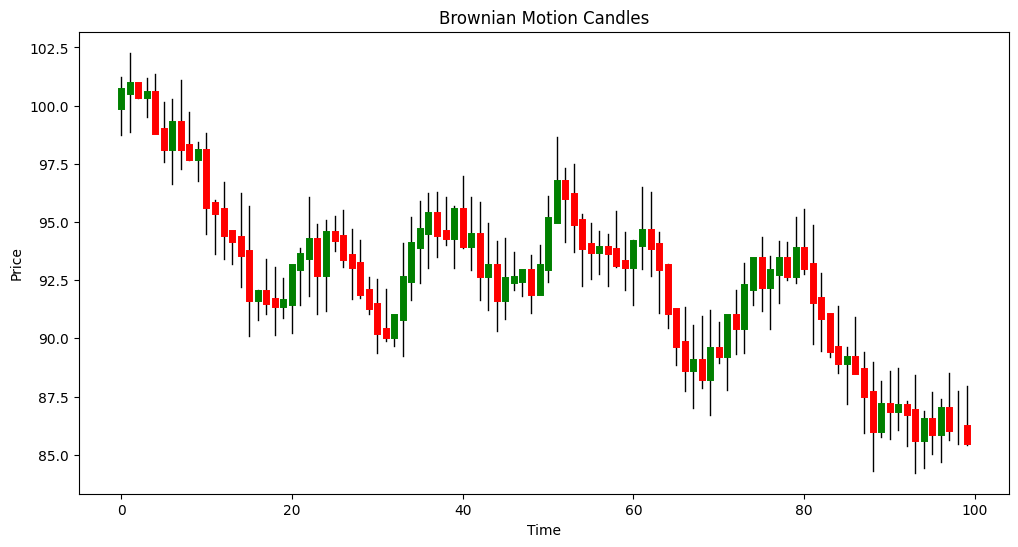

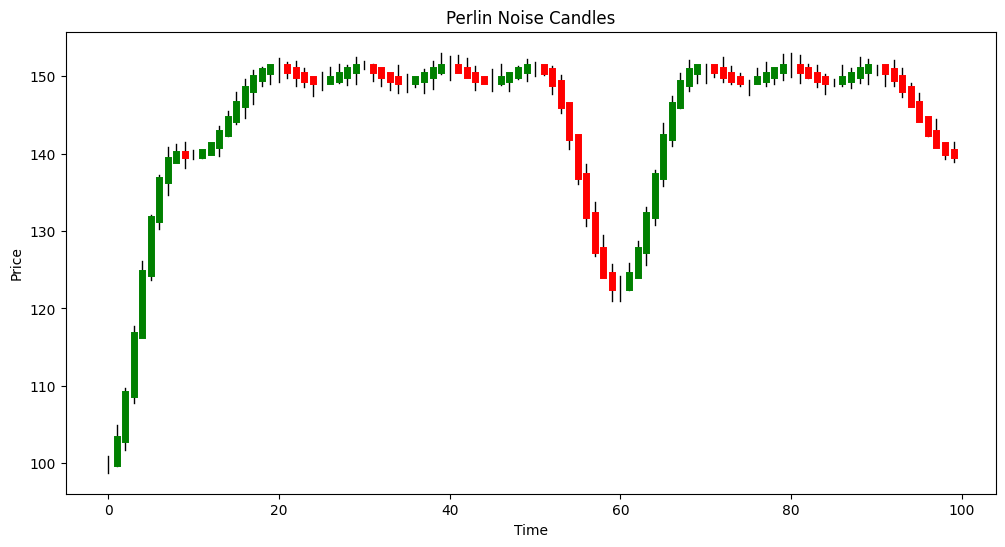

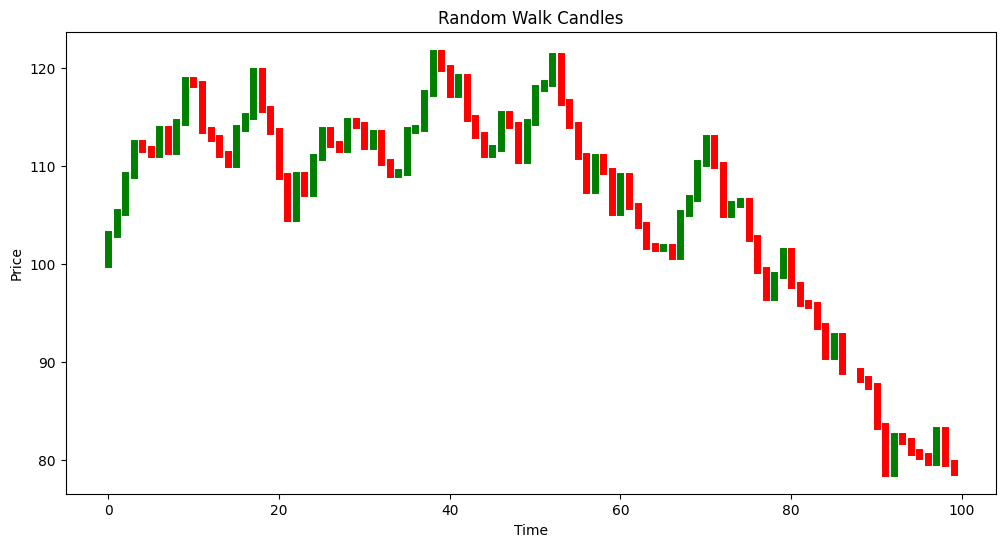

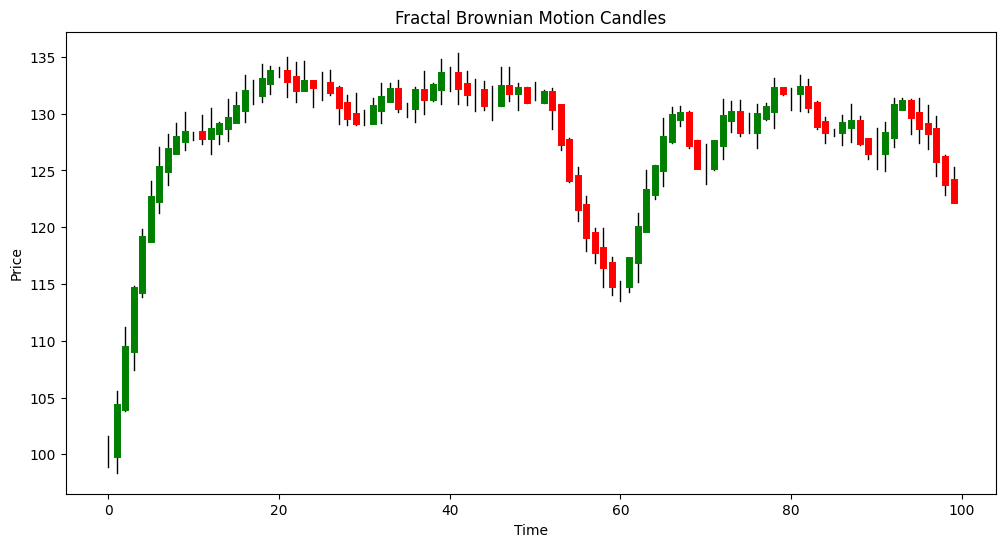

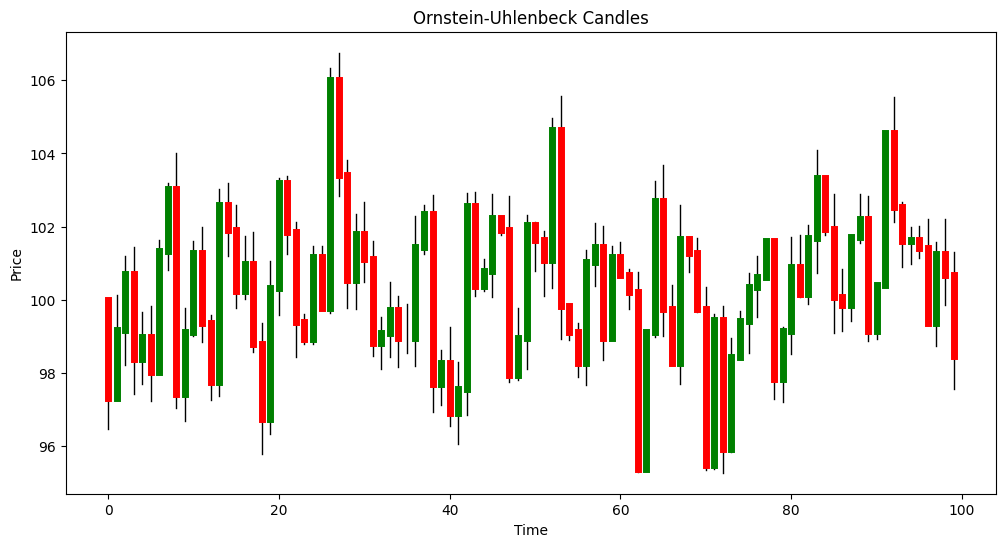

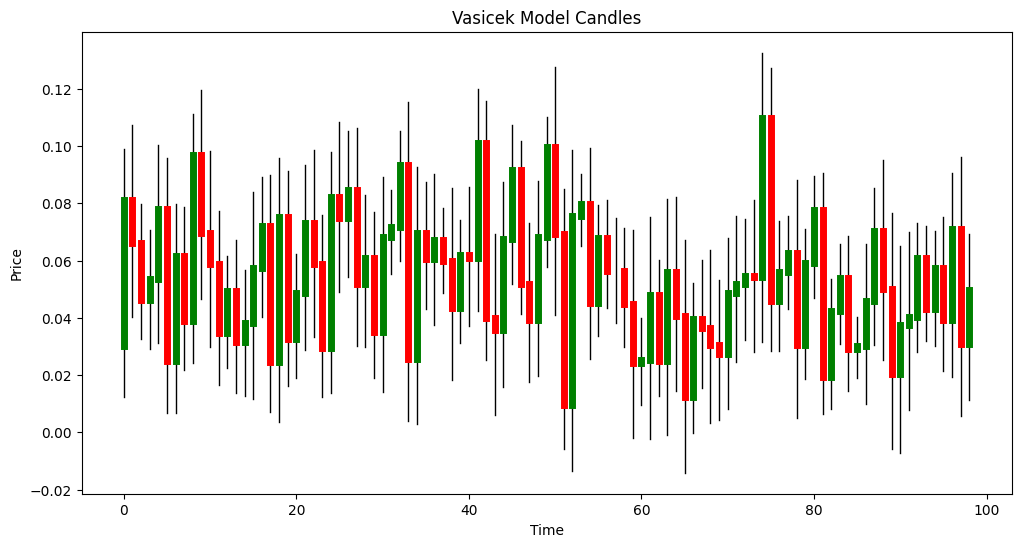

In [10]:

if __name__ == "__main__":
    # Generate and plot existing candle data
    try:
        # Generate candles using different models
        brownian_df = generate_brownian_motion_candles(100)
        perlin_df = generate_perlin_noise_candles(100)
        random_walk_df = generate_random_walk_candles(100)
        fbm_df = generate_fbm_candles(100)
        ou_df = generate_ornstein_uhlenbeck_candles(n=100, theta=0.7, mu=100, sigma=2.0, X0=100.0, dt=1.0)
        vasicek_df = generate_vasicek_candles(n=100, theta=1.0, mu=0.05, sigma=0.02, r0=0.03, dt=1.0)

        # Plot each candle generator
        plot_candles(brownian_df, title='Brownian Motion Candles')
        plot_candles(perlin_df, title='Perlin Noise Candles')
        plot_candles(random_walk_df, title='Random Walk Candles')
        plot_candles(fbm_df, title='Fractal Brownian Motion Candles')
        plot_candles(ou_df, title='Ornstein-Uhlenbeck Candles')
        plot_candles(vasicek_df, title='Vasicek Model Candles')
    except ValueError as e:
        print(f"Error: {e}")